In [2]:
import numpy as np
from scipy.stats import norm, t

import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets
plt.style.use('fivethirtyeight')
import check_lab00 as p

Note: If you download this notebook to edit offline in the computer lab, you will need [this file](https://raw.githubusercontent.com/cooperrc/sensors_and_data/master/ME3263-Lab_00/check_lab00.py) (right click -> save as) in the same directory as the .ipynb file.

# ME 3263 - Laboratory # 0
## Introduction to Student's t-test

All experimental measurements are subject to random variation. No two measurements will be exactly the same. This variation can, for example, be caused by:

1. Natural differences in a population
1. Unpredictable fluctuations in experimental conditions
1. Uncertainties inherent to the measurement device or system

In practice, this means that we will always be working with uncertain data. Due to cost or practicallity concerns, we will often be working with _limited samples_ of uncertain data. In these situations, we can use Student's t-test to test hypotheses about our data sets, and we can use t-values to establish confidence intervals for the true mean of our measured value.

## Mean and standard deviation

When the same measurement is taken multiple times, the measurements will tend to cluster about a central value: the mean, $\bar{x}$. If we're able to determine an average value, then we're also able to describe how much our measurements deviate from that average value: the standard deviation, $s$. The expressions for mean and standard deviation are:

$\bar{x} = \sum_{i=1}^{N}\frac{x_{i}}{N}$

and

$s^2 = \frac{\sum_{i=1}^{N}(x_{i}-\bar{x})^2}{N}$,

where $x_i$ is the $i^{th}$ measurement in a dataset called $x$ and $N$ is the number of data points. 

When discussing a normal distribution, the mean and standard deviation are notated by $\mu$ and $\sigma$, respectively. If we know $\mu$ and $\sigma$ of a _normally distributed_ data set, then we can predict the relative probability a given measurement will occur. The [probability density function](https://en.wikipedia.org/wiki/Probability_density_function) (PDF) for the difference between measurement $x_{i}$ and mean $\mu$ is shown below for $\sigma=1$. 


Text(0, 0.5, 'Relative Probability')

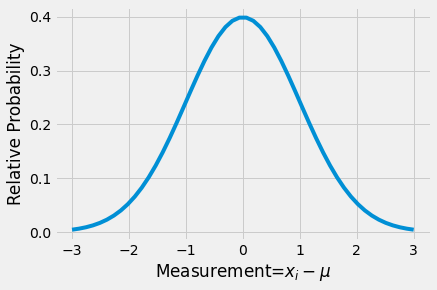

In [2]:
x=np.linspace(-3,3)
y=norm.pdf(x,0,1)
plt.plot(x,y)
plt.xlabel('Measurement=$x_i-\mu$')
plt.ylabel(r'Relative Probability')

Half of the measured values are above the mean, $\mu$, and half below. To determine the actual probability for any given range of values to be observed, we can integrate the probability density function between two values (the lower and upper boundaries of the range of interest). For example, we could integrate the PDF from -$\infty$ to $x$ to find the probability of measuring a value $\le x$. This distribution (shown below) is called the [cumulative distribution function](https://en.wikipedia.org/wiki/Cumulative_distribution_function) (CDF).

Text(0, 0.5, 'Cumulative Probability (%)')

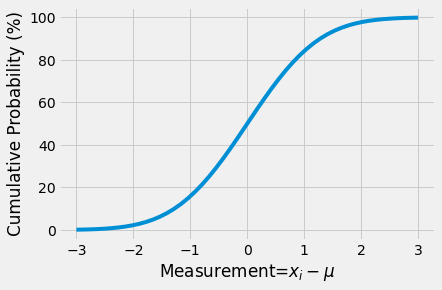

In [3]:
x=np.linspace(-3,3)
y=norm.cdf(x,0,1)*100 # convert fraction to percent
plt.plot(x,y)
plt.xlabel('Measurement=$x_i-\mu$')
plt.ylabel(r'Cumulative Probability (%)')

## The problem

If we take anything less than an infinite number of measurements, then the mean and standard deviation, $\mu$ and $\sigma$, are subject to random variation, and we _cannot know them exactly_. Take the following five data sets of 20 random numbers, each taken from a normal distribution with $\mu=10$ and $\sigma=1$. 

In [4]:
for i in range(0,5):
    data=np.random.normal(10,1,20) # generate 20 random numbers with true mean of 10 and true std of 1
    # print the mean and standard deviation
    print('data mean=%1.3f, standard deviation=%1.3f'%(np.mean(data),np.std(data)))
    

data mean=9.950, standard deviation=1.220
data mean=9.966, standard deviation=0.827
data mean=10.091, standard deviation=1.118
data mean=10.466, standard deviation=0.966
data mean=10.031, standard deviation=1.020


Each average and standard deviation is subject to random variation. Here the variation is artificially created by Python, but the real-world effect is the same: to know the _population parameters_, we must infer them from a limited sample.

### Example Problem #1

Try creating 100 normally disributed random numbers with an average of 10 and standard deviation of 1. How close is the average to 10? How close is the standard deviation to 1?

In [5]:
data # enter your work here
pts=p.check_p01(data)


Whoops, try again


## The solution - Student's t-test

[William S. Gossett](https://en.wikipedia.org/wiki/William_Sealy_Gosset) was working for Guinness in 1908 when he found a solution to the small sample size problem. To prevent the release of trade secrets (which had happened in the past), Guinness only allowed their employees to publish under the conditions that they not mention: _"1. beer, 2. Guiness, or 3. their own surname"_. Gossett published under the pseudonym Student, and we now refer to his work as "Student's t-distribution" and "Student's t-test". 

We can use Student's t-distribution to:
1. Establish confidence limits for the mean estimated from smaller sample sizes. This will give us error bars.

2. Test the statistical significance of the difference between means from two independent samples. 

### Confidence intervals

When describing a set of sample measurements, we can describe the variance and standard deviation _of the data set_ using the expression for $s$ shown above. However, using this to _estimate population parameters_ will underestimate the population variance. We must instead use the _sample standard deviation_ (which is an "unbiased estimator"), with $n-1$ in the denominator:

$S_x^2 = \frac{\sum_{i=1}^{n}(x_{i}-\bar{x})^2}{n-1}$

The confidence interval for a given data set is calculated with the mean: $\bar{x}$, sample standard deviation: $S_x$, number of sample points: $n$, and t-statistic: $t=f(\nu, P)$. The equation for the confidence interval of a small data set is:

$x'$=$\bar{x} \pm t_{(\nu,P)}\frac{S_x}{\sqrt{n}}$

where x is the measured quantity, P is the chosen confidence interval, $\nu$=df=n-1 is the degrees of freedom, and $\frac{S_x}{\sqrt{n}}$ is the "standard deviation of the mean". 

For example, lets look at the previous data set generated from a normal distribution with $\mu=10$ and $\sigma=1$. Here, we are establishing a confidence interval to 95%. Notice the confidence interval narrows with increasing $n$.

In [5]:
n=20
tstat=t.interval(0.95, n-1) # calculate the 95% interval t-statistic
for i in range(0,5):
    data=np.random.normal(10,1,n) # generate N random numbers with true mean of 10 and true std of 1
    avg=np.mean(data)
    std=np.std(data, ddof=1) #The divisor used in calculations is N - ddof, where N is the length of the data vector. 
    n=len(data)    
    print('data confidence interval is %1.3f +/- %1.3f'%(avg,tstat[1]*std/np.sqrt(n)))

data confidence interval is 9.920 +/- 0.441
data confidence interval is 9.720 +/- 0.469
data confidence interval is 10.195 +/- 0.382
data confidence interval is 9.689 +/- 0.447
data confidence interval is 9.773 +/- 0.436


In [3]:
def convergence_of_mean(n):
    x=np.linspace(-3,3)
    y=norm.pdf(x,0,1) 
    plt.plot(x,y)
    y_sample=np.random.normal(0,1,n)
    std=np.std(y_sample, ddof=1)
    tstat=t.interval(0.95, n-1)
    CI=tstat[1]*std/np.sqrt(n)
    plt.hist(y_sample,density=True)
    plt.vlines([np.mean(y_sample)-CI,np.mean(y_sample)+CI],0,0.4)
    plt.xlabel('Measurement=$x_i-\mu$')
    plt.ylabel(r'Relative Probability')
    plt.axis([-3,3,0,0.5])
    
interact(convergence_of_mean,n=(5,1000))
print('The bars show the confidence interval based upon n measurements')
print('Use the slider to change the number of samples, n')

interactive(children=(IntSlider(value=502, description='n', max=1000, min=5), Output()), _dom_classes=('widget…

The bars show the confidence interval based upon n measurements
Use the slider to change the number of samples, n


The interactive plot above generates `n` normally distributed numbers and plots the histogram with two vertical lines to indicate the confidence interval of the measured mean. More measurements, larger `n`, produce a smaller interval, even though the standard deviation is constant. 

### Example Problem #2

Try creating 100 normally disributed random numbers with a true average of 10 and true standard deviation of 1. What is the confidence interval for the measured average? Is it higher or lower than the confidence interval for 20 samples?

In [7]:
n=100
data # =... enter your work here
tstat# =... enter your work here
avg #  =... enter your work here
std#  =... enter your work here
conf_interval = tstat[1]*std/np.sqrt(n)

p.check_p02(avg,conf_interval)

NameError: name 'avg' is not defined

## The Difference Between Two Means
To test for a difference between the means of two independent sampes, we use the _t-test for independent samples_, also called the _two-sample t-test_. Each sample set can contain a different number of measurements. We assume that the populations we are sampling from follow a normal distribution. Student's t-test tests the Null Hypothesis. 

*Null hypothesis: there is no difference between the two sample means*

The t-test is based upon the means: $\bar{x}_1$ and $\bar{x}_2$, sample standard deviations (i.e., using $n-1$ in the denominator): $S_{x,1}$ and $S_{x,2}$, and number of data points: $n_1$ and $n_2$. The t-variable for sets of independent samples is based upon the difference in means between sample sets:

$t=\frac{|\bar{x}_1-\bar{x}_2|}{\sqrt{AB}}$

where:

$A=\frac{n_1+n_2}{n_1 n_2}$

$B=\frac{(n_1-1)S_{x,1}^2+(n_2-1)S_{x,2}^2}{n_1+n_2-2}$


Let's look at the results of a two sample t-test for the means of two sample sets drawn from our normal distribution ($\mu=10$, $\sigma=1$). We can compare the t-statistic to several critical t-values for various confidence intervals: 

In [30]:
n=200
data1=np.random.normal(10,1,n)
data2=np.random.normal(10,1,n)

avg1=np.mean(data1); avg2=np.mean(data2)
std1=np.std(data1,ddof=1); std2=np.std(data2,ddof=1); #making sure to use ddof=1 to divide by n-1
n1=n2=n

A=np.abs(n1+n2)/(n1*n2*1.0)
B=((n1-1)*std1**2+(n2-1)*std2**2)/(n1+n2-2)

tstat=np.abs(avg1-avg2)/np.sqrt(A*B)

print('t=%1.2f'%tstat)

df=2*n-2

# Print out the table for df degrees of freedom (N1+N2-2)
print('df=%i'%df )
print('| p=0.05 | p=0.025 | p=0.01 | p=0.005 |')
print('|    --- |     --- |    --- |     --- |')
print("| %1.2f   | %1.2f    | %1.2f   | %1.2f    |"%(t.interval(0.95, df)[1],\
                                                     t.interval(0.975, df)[1],\
                                                     t.interval(0.99, df)[1],\
                                                     t.interval(0.995, df)[1]))

t=0.10
df=398
| p=0.05 | p=0.025 | p=0.01 | p=0.005 |
|    --- |     --- |    --- |     --- |
| 1.97   | 2.25    | 2.59   | 2.82    |


For almost all random sets generated for `data1` and `data2`, our t-statistic will be lower than even the p=0.05 confidence interval (equivalent to P=95% - this is often written both ways). This indicates that we cannot reject the null hypothesis. Based upon the current data set, there is no observed difference between the two sample averages. This makes sense - the two sample sets were drawn from the same normal distribution with $\mu=10$ and $\sigma=1$. 

### Example Problem #3

Try changing the means of the two sample sets. What happens to the value of tstat?

At what point does the t-statistic become statistically significant? Keep the standard deviations, $\sigma=1$, and vary the averages for `data1` and `data2`, shown above as `10` and `10`. With 200 samples, can you reliably measure the difference between 10 and 11? or 10 and 10.1? 

Create two datasets, `data1` and `data2`, that *are* statistically different, with $p\le 0.05$ (in other words, $P\ge 95\%$), but have means within 10% of each other. 



In [ ]:
data1 #=
data2 #=
p.check_p03(data1,data2)

## Data to Analyze - Marble Madness Design Problem

Your company manufactures marbles with glass. There was a mix-up with the glass delivery and all of the affected marbles are at higher risk of shattering. The faulty glass has a slightly different density, $\rho_{faulty}$=2.80 g/cm$^3$, than your normal manufacturing glass, $\rho_{mfg}$=2.52 g/cm$^3$. 

You take 15 samples from three bins: A, B, and C. You know that bin A is the correct glass, but bins B and C might have the faulty glass. Write a report that clarifies whether bins B and C are safe to ship using Student's t-test and creating confidence intervals for the three bins' samples to a 95% confidence level. 

|mass(g) A |mass(g)  B|mass(g)  C|
|---|---|---|
|34.6| 40.3| 56.1|
|40.7| 35.0| 59.3|
|37.5| 43.7| 51.4|
|45.8| 43.2| 50.2|
|41.4| 41.1| 46.4|
|44.2| 42.3| 56.1|
|44.5| 39.8| 43.1|
|51.8| 39.2| 55.1|
|47.5| 49.4| 46.9|
|45.4| 43.2| 39.9|
|36.4| 44.4| 51.8|
|46.2| 44.8| 46.2|
|43.0| 44.5| 49.7|
|43.3| 50.1| 54.9|
|42.0| 47.1| 64.5|

## Your Report 

1. INTRODUCTION

    1. What is the problem and how will you solve it? 
  
    1. What is Student's t-test?

    1. In general, what assumptions are made when using a t-test? 
    
    1. What do the results of a t-test tell you?

    1. When/why would you use Student's t-test?
    
    1. What assumptions, if any, have been made for your analysis?
   
2. METHODS

    1. Description of materials and measurements
  
    1. Description of t-test procedure

    1. If someone repeated the experiment, he/she would read only this section

3. RESULTS AND DISCUSSION

    1. Present experimental results succinctly

    1. Interpret results clearly

    1. Compare the averages and confidence intervals for bins A, B, and C
  
    1. Describe the t-test results - how confident is your rejection/non-rejection of the null hypothesis?

4. CONCLUSION

    1. Is this a good method to use for this application?
  
    1. How could we make it better?

    1. What other applications could benefit from this technique/these results?



**Links of Interest and References**

\[0\] Student. (1908). [The probable error of a mean](https://github.com/cooperrc/sensors_and_data/blob/master/ME3263-Lab_00/student_error-of-mean.pdf). Biometrika, 1-25.

\[1\] ['Student's' t Test (For Independent Samples)
](https://www.ruf.rice.edu/~bioslabs/tools/stats/ttest.html)

\[2\] [t-based Confidence Interval for the Mean](http://www.stat.wmich.edu/s216/book/node79.html)

\[3\] [Confidence intervals,
t tests,
P values](http://evolution.gs.washington.edu/gs560/2011/lecture3.pdf)

\[4\] [Student's t-test](https://serc.carleton.edu/introgeo/teachingwdata/Ttest.html)

\[5\] Sehgal, J., & Ito, S. (1999). [Brittleness of glass](https://github.com/cooperrc/sensors_and_data/blob/master/ME3263-Lab_00/brittleness_of_glass.pdf). Journal of non-crystalline solids, 253(1-3), 126-132.